In [1]:
#TSOPOURIDIS GRIGORIOS, AM:3358
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

#FIX TRACES OF OLD REMAINS


#affine transformation function
def affineTransformation(inputPath, outputPath, a1 ,a2 , a3, a4, a5, a6):
    inImage = np.array(Image.open(inputPath))

    #affine transformation matrix
    #changed due to numpy axes being opposite from the usual, starting from 0,0
    #affine = [[a1,a2,a3], [a1,a2,a3], [0,0,1]]
    #changed a? variables due to numpy coordinate system and transposed affine multiplication
    affine = [[a5,a2,a6], [a4,a1,a3], [0,0,1]]

    affine = np.array(affine)

    #print(affine)
    centeredCoord = []
    #x image coordinates centered to the center of the image
    for i in range((int((-1)*np.floor(len(inImage)/2))),int(np.ceil(len(inImage)/2))):
        for j in range((int((-1)*np.floor(len(inImage[0])/2))),int(np.ceil(len(inImage[0])/2))):
            centeredCoord.append([i,j,1])


    #application of affine transformation on the image
    #move image center to upper left corner again.

    centeredCoord = np.array(centeredCoord)
    
    x = int((-1)*np.floor(len(inImage)/2))
    y = int(np.ceil(len(inImage[0])/2)) - 1

    centeredCoord = centeredCoord + [-x,y,0]
    #centeredCoord * affine (transposed)
    centeredCoordAffine = np.matmul(centeredCoord, affine.T) 

    tempIm = inImage.copy()
    inImage.fill(0)
    for (p1,p2) in zip(centeredCoord,centeredCoordAffine):
        if(p2[0] >= len(inImage) or p2[1] >= len(inImage[0]) or p2[0] < 0 or p2[1] < 0):
            #convert negative(inversed) coordinates to (image with negative scale)
            #0-imagesize-1
            if(a5<0 or a1 < 0):
                if(not(p2[1] >= len(inImage[0])) and not(p2[0] >= len(inImage))):
                    x1 = p2[0]
                    y1 = p2[1]

                    #x axis
                    if(a5<0):
                        x1 = len(inImage)+ p2[0]-1
                    #y axis
                    if(a1<0):
                        y1 = len(inImage)+p2[1]-1
                    #prevent image wrapping over the edges
                    if(x1<0 or y1<0):
                        continue
                    #print((x1,y1))
                    inImage[x1][y1] = tempIm[p1[0]][p1[1]]
        else:
            inImage[p2[0]][p2[1]] = tempIm[p1[0]][p1[1]]

    #nearest neighbor interpolation
    #adjuct y due to inversed axis
    for x in range(0,len(inImage)):
        for y in range(0,len(inImage[0])):
            if(inImage[x][y] == 0 and x-1 < len(inImage)and x+1 < len(inImage) and y-1 < len(inImage[0])and y+1 < len(inImage[0])):
                if(inImage[x][y+1] != 0):
                    inImage[x][y] = inImage[x][y+1] 
                elif(inImage[x+1][y] != 0):
                    inImage[x][y] = inImage[x+1][y]
                #edo


                
                #elif(inImage[x-1][y] != 0):
                #     inImage[x][y] = inImage[x-1][y]

                elif(inImage[x][y-1] != 0 and y+2 < len(inImage[0])):
                    if(inImage[x][y+2] != 0):
                        inImage[x][y] = inImage[x][y-1]
                    elif(inImage[x+1][y+1] != 0):
                        inImage[x][y] = inImage[x+1][y+1]
                    elif(inImage[x+1][y-1] != 0):
                        inImage[x][y] = inImage[x+1][y-1]
                    elif(inImage[x+1][y] != 0):
                        inImage[x][y] = inImage[x+1][y]                    
                elif(inImage[x-1][y] != 0 and x+2 < len(inImage)):
                    if(inImage[x+2][y] != 0):
                        inImage[x][y] = inImage[x-1][y]
                    elif(inImage[x-1][y+1] != 0):
                        inImage[x][y] = inImage[x-1][y+1]
                    elif(inImage[x-1][y-1] != 0):
                        inImage[x][y] = inImage[x-1][y-1]    
                                       

    #save the output image to the given file path
    plt.imshow(inImage, cmap="gray")
    plt.savefig(outputPath)

#main
if __name__ == "__main__":
    if(not(len(sys.argv) == 9)):
        print("Incorrect format.")
        print("python3 ask2.py <input filename> <output filename> <a1> <a2> <a3> <a4> <a5> <a6>")
    else:
        affineTransformation(sys.argv[1],sys.argv[2],int(sys.argv[3]),int(sys.argv[4]),int(sys.argv[5]),int(sys.argv[6]),int(sys.argv[7]),int(sys.argv[8]))


Incorrect format.
python3 ask2.py <input filename> <output filename> <a1> <a2> <a3> <a4> <a5> <a6>


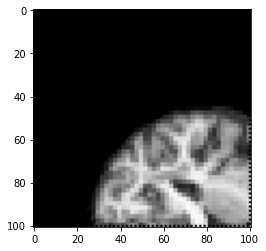

In [2]:
affineTransformation('brain0030slice150_101x101.png','test.png',2,0,0,0,2,0)

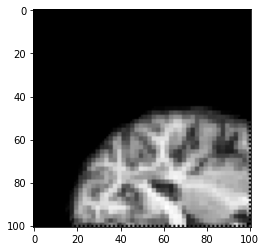

In [3]:
affineTransformation('brain0030slice150_101x101.png','test.png',2,0,-10,0,2,0)

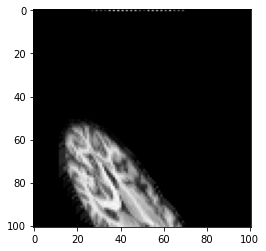

In [4]:
affineTransformation('brain0030slice150_101x101.png','test.png',1,1,0,0,1,0)

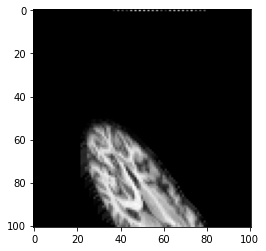

In [5]:
affineTransformation('brain0030slice150_101x101.png','test.png',1,1,10,0,1,0)

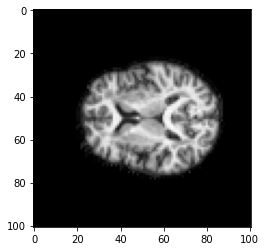

In [6]:
affineTransformation('brain0030slice150_101x101.png','test.png',-1,0,0,0,-1,0)